In [1]:
# Dependencies
import matplotlib as mpl
import os
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import datetime as dt

# Location of the data
city_filepath = os.path.join('Resources', 'city_data.csv')
ride_filepath = os.path.join('Resources', 'ride_data.csv')

In [2]:
city_data = pd.read_csv(city_filepath)
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [3]:
ride_data = pd.read_csv(ride_filepath)
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [4]:
all_data = ride_data.merge(city_data, on='city')
all_data['date'] = pd.to_datetime(all_data['date'])
all_data.sort_values(['date'], ascending=True, inplace=True)
all_data

,city,date,fare,ride_id,driver_count,type
1313,Liumouth,2019-01-01 00:08:16,37.91,5673666505216,69,Urban
2161,Colemanland,2019-01-01 00:46:46,47.74,2215912677020,23,Suburban
2022,Sotoville,2019-01-01 02:07:24,24.07,7827431948090,10,Suburban
1225,Royland,2019-01-01 03:46:50,7.57,5815378003370,64,Urban
583,West Heidi,2019-01-01 05:23:21,10.75,6571513080673,28,Urban
...,...,...,...,...,...,...
1184,Carriemouth,2019-05-08 04:20:00,21.99,117997692054,52,Urban
1382,Raymondhaven,2019-05-08 04:39:49,18.45,1811574736337,11,Urban
252,North Jasmine,2019-05-08 07:29:01,18.55,5682021476085,33,Urban
208,South Karenland,2019-05-08 11:38:35,19.77,7837163332630,4,Urban


In [5]:
# Gather Total Rides, Average fare, and Driver count for each city sorted by city type; then graph it.
urban_cities_df = all_data[all_data['type'] == "Urban"]
rural_cities_df = all_data[all_data['type'] == "Rural"]
suburban_cities_df = all_data[all_data['type'] == "Suburban"]

rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_driver_count = city_data[city_data['type']=='Rural'].set_index('city')['driver_count']
rural_fares = rural_cities_df.groupby(['city']).mean()['fare']

urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_driver_count = city_data[city_data['type']=='Urban'].set_index('city')['driver_count']
urban_fares = urban_cities_df.groupby(['city']).mean()['fare']

suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_driver_count = city_data[city_data['type']=='Suburban'].set_index('city')['driver_count']
suburban_fares = suburban_cities_df.groupby(['city']).mean()['fare']

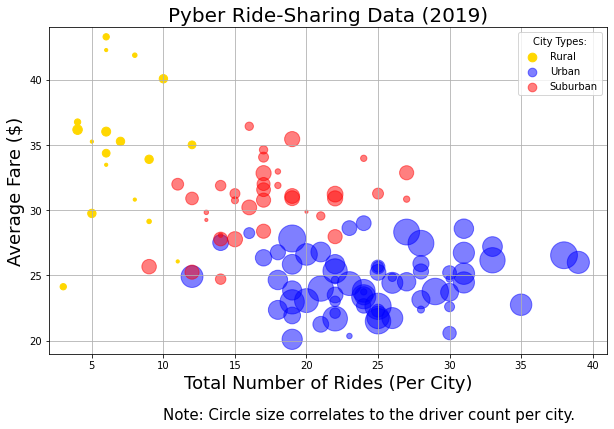

In [6]:
# The Graph 
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=rural_ride_count, y=rural_fares, s=10*rural_driver_count, color='gold', label="Rural")
ax.scatter(x=urban_ride_count, y=urban_fares, s=10*urban_driver_count, color='blue', label="Urban", alpha=0.5)
ax.scatter(x=suburban_ride_count, y=suburban_fares, s=10*suburban_driver_count, color='red', label='Suburban', alpha=0.5)
ax.set_xlabel('Total Number of Rides (Per City)', fontsize='18')
ax.set_ylabel('Average Fare ($)', fontsize='18')
ax.set_title('Pyber Ride-Sharing Data (2019)', fontsize='20')
ax.set_xlim(min(rural_ride_count)-1, max(urban_ride_count)+2)
ax.set_ylim(round(min(urban_fares), 0)-1, round(max(rural_fares), 0)+1)
lgnd = ax.legend(mode='Expanded', loc="best", title="City Types:", scatterpoints=1)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
mpl.rcParams['font.size'] = 15
# lgnd.get_title().set_fontsize(12)
ax.text(10,14,"Note: Circle size correlates to the driver count per city.", fontsize='15', wrap=True)
# mpl.style.use('fivethirtyeight')
ax.grid(True)
png = os.path.join('Analysis', 'Pyber_Ride_Sharing_Data_2019.png')
fig.savefig(png, bbox_inches='tight', transparent=False, facecolor='w')

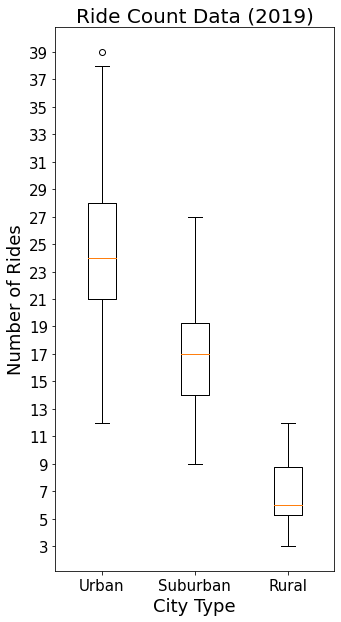

In [7]:
fig1, ax1 = plt.subplots(figsize=(5, 10))
ride_count = [urban_ride_count, suburban_ride_count, rural_ride_count]
x_labels = ["Urban", "Suburban", "Rural"]
ax1.boxplot(x=ride_count, labels=x_labels)
ax1.set_xlabel('City Type', fontsize='18')
ax1.set_title('Ride Count Data (2019)', fontsize='20')
ax1.set_yticks(np.arange(min(all_data.groupby(['city'])['ride_id'].count()),max(all_data.groupby(['city'])['ride_id'].count())+2, 2))
ax1.set_ylabel('Number of Rides', fontsize='18')
png1 = os.path.join('Analysis','Ride_Count_Data_2019.png')
fig1.savefig(png1, bbox_inches='tight', transparent=False, facecolor='w')

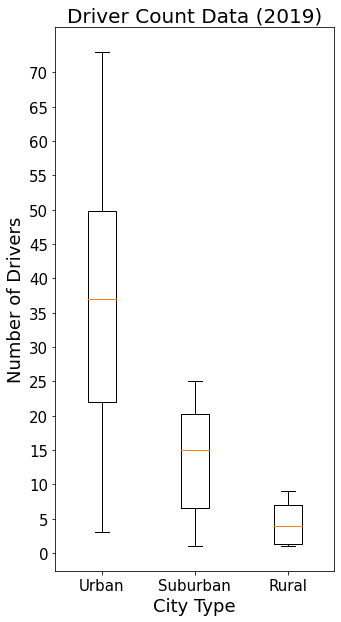

In [8]:
fig2, ax2 = plt.subplots(figsize=(5, 10))
driver_count = [urban_driver_count, suburban_driver_count, rural_driver_count]
# x_labels = ["Urban", "Suburban", "Rural"]  # declared the same as above
ax2.boxplot(x=driver_count, labels=x_labels)
ax2.set_xlabel('City Type', fontsize='18')
ax2.set_title('Driver Count Data (2019)', fontsize='20')
ax2.set_yticks(np.arange(min(city_data.set_index('city')['driver_count'])-1,max(city_data.set_index('city')['driver_count'])+2, 5))
ax2.set_ylabel('Number of Drivers', fontsize='18')
png2 = os.path.join('Analysis', 'Driver_Count_Data_2019.png')
fig2.savefig(png2, transparent=False, facecolor='w', bbox_inches='tight')

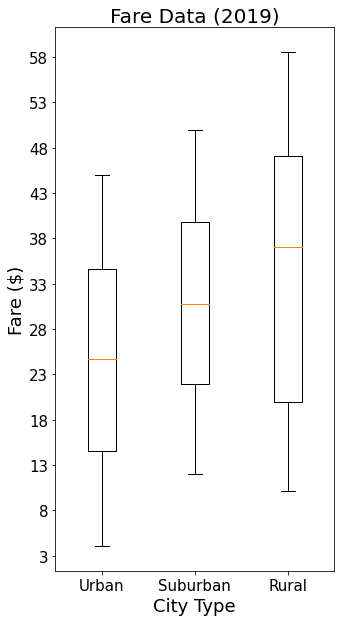

In [9]:
fig3, ax3 = plt.subplots(figsize=(5, 10))
fare_data = [urban_cities_df['fare'], suburban_cities_df['fare'], rural_cities_df['fare']]
# # x_labels = ["Urban", "Suburban", "Rural"]  # declared the same as above
ax3.boxplot(x=fare_data, labels=x_labels)
ax3.set_xlabel('City Type', fontsize='18')
ax3.set_title('Fare Data (2019)', fontsize='20')
ax3.set_yticks(np.arange(min(round(all_data['fare'], 0)-1),max(round(all_data['fare'], 0))+2, 5))
ax3.set_ylabel('Fare ($)', fontsize='18')

# save the graph
png3 = os.path.join('Analysis', 'Ride_Fare_Data_2019.png')
fig3.savefig(png3, transparent=False, facecolor='w', pad_inches=0.1, bbox_inches='tight')


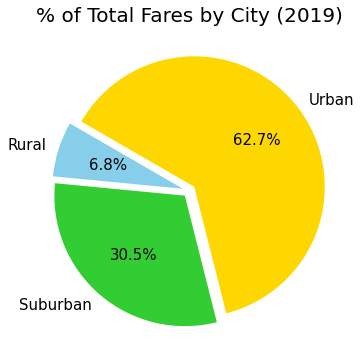

In [10]:
fig4, ax4, = plt.subplots(figsize=(6,6))
explode = [0.05, 0.05, 0.05]

ax4.pie(all_data.groupby(['type']).sum()['fare'], labels=all_data.groupby(['type']).sum()['fare'].index, 
        autopct='%1.1f%%', explode=explode, colors=['skyblue', 'limegreen', 'gold'], startangle=150)

ax4.set_title('% of Total Fares by City (2019)', fontsize='20')

png4 = os.path.join('Analysis', 'Total_Fares_by_City.png')
fig4.savefig(png4, transparent=False, facecolor='w')


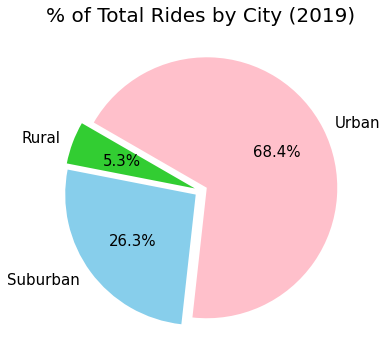

In [11]:
fig5, ax5, = plt.subplots(figsize=(6,6))

ax5.pie(x=all_data.groupby(['type']).count()['ride_id'], labels=all_data.groupby(['type']).sum()['ride_id'].index, 
        autopct='%1.1f%%', explode=explode, colors=['limegreen', 'skyblue', 'pink'], startangle=150)

ax5.set_title('% of Total Rides by City (2019)', fontsize='20')

png5 = os.path.join('Analysis', 'Total_Rides_by_City.png')
fig5.savefig(png5, transparent=False, facecolor='w')



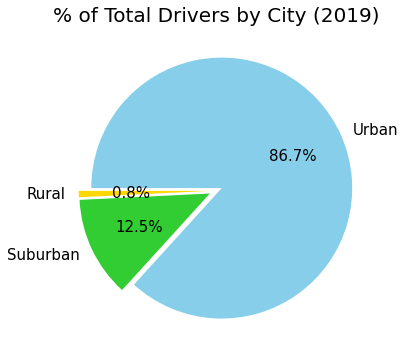

In [47]:
fig6, ax6, = plt.subplots(figsize=(6,6))

ax6.pie(x=all_data.groupby(['type']).sum()['driver_count'], labels=all_data.groupby(['type']).sum()['driver_count'].index, 
        autopct='%1.1f%%', explode=explode, colors=['gold','limegreen', 'skyblue'], startangle=180)

ax6.set_title('% of Total Drivers by City (2019)', fontsize='20')

png6 = os.path.join('Analysis', 'Total_Drivers_by_City.png')
fig6.savefig(png6, transparent=False, facecolor='w')


## Deliverable 1: Get a Summary DataFrame 

In [13]:
#  1. Get the total rides for each city type
pyber_summary_df = all_data.groupby(['type']).count()[['ride_id']].rename({'ride_id':'total_rides'}, axis=1)
pyber_summary_df


,total_rides
type,
Rural,125
Suburban,625
Urban,1625


In [14]:
# 2. Get the total drivers for each city type
pyber_summary_df["total_drivers"] = city_data.groupby(['type']).sum()[['driver_count']]
pyber_summary_df

,total_rides,total_drivers
type,,
Rural,125,78
Suburban,625,490
Urban,1625,2405


In [15]:
#  3. Get the total amount of fares for each city type
pyber_summary_df['total_fare'] = all_data.groupby(['type']).sum()['fare']
pyber_summary_df

,total_rides,total_drivers,total_fare
type,,,
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


In [16]:
#  4. Get the average fare per ride for each city type. 
pyber_summary_df['avg_fare'] = all_data.groupby(['type']).mean()['fare']
pyber_summary_df

,total_rides,total_drivers,total_fare,avg_fare
type,,,,
Rural,125,78,4327.93,34.623440
Suburban,625,490,19356.33,30.970128
Urban,1625,2405,39854.38,24.525772


In [17]:
# 5. Get the average fare per driver for each city type. 
pyber_summary_df['avg_fare_per_driver'] = pyber_summary_df['total_fare']/pyber_summary_df['total_drivers']
pyber_summary_df

,total_rides,total_drivers,total_fare,avg_fare,avg_fare_per_driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [18]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
f_pyber_summary_df = pyber_summary_df.copy()
f_pyber_summary_df

,total_rides,total_drivers,total_fare,avg_fare,avg_fare_per_driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [19]:
f_pyber_summary_df['total_rides'] = f_pyber_summary_df['total_rides'].map('{:,}'.format)
f_pyber_summary_df['total_drivers'] = f_pyber_summary_df['total_drivers'].map('{:,}'.format)
f_pyber_summary_df['total_fare'] = f_pyber_summary_df['total_fare'].map('${:,.2f}'.format)
f_pyber_summary_df['avg_fare'] = f_pyber_summary_df['avg_fare'].map('${:,.2f}'.format)
f_pyber_summary_df['avg_fare_per_driver'] = f_pyber_summary_df['avg_fare_per_driver'].map('${:,.2f}'.format)
f_pyber_summary_df                                                                                         

,total_rides,total_drivers,total_fare,avg_fare,avg_fare_per_driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.


In [20]:
# Change the date column's data type to a datetime.date
all_data['date'] = pd.to_datetime(all_data['date'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 1313 to 914
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   city          2375 non-null   object        
 1   date          2375 non-null   datetime64[ns]
 2   fare          2375 non-null   float64       
 3   ride_id       2375 non-null   int64         
 4   driver_count  2375 non-null   int64         
 5   type          2375 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 129.9+ KB


In [21]:
# sort the Fare for the city type with an index of date
total_fare_by_datetime = all_data[all_data['date'].dt.month<5].groupby(['type','date']).sum()[['fare']].reset_index().pivot(index='date', columns='type', values='fare')

# get the weekly total fare by city type
total_fare_by_datetime = total_fare_by_datetime.resample('W').sum()
total_fare_by_datetime = total_fare_by_datetime[total_fare_by_datetime.index.month!=5]

total_fare_by_datetime

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


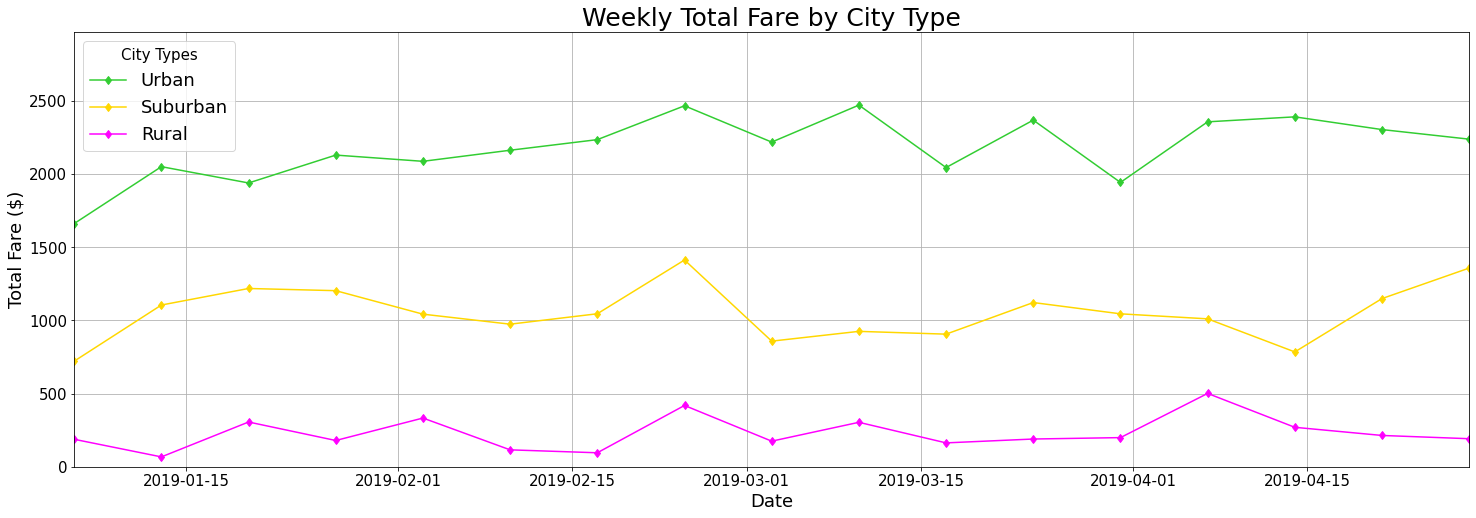

In [26]:
# plot the city types on a line graph
fig7, ax7, = plt.subplots(figsize=(25,8))
ax7.plot(total_fare_by_datetime.index, total_fare_by_datetime['Urban'], color='limegreen', marker='d', label='Urban')
ax7.plot(total_fare_by_datetime.index, total_fare_by_datetime['Suburban'], color='gold', marker='d', label='Suburban')
ax7.plot(total_fare_by_datetime.index, total_fare_by_datetime['Rural'], color='magenta', marker='d', label='Rural')
ax7.set_xlabel('Date', fontsize='18')
ax7.set_ylabel('Total Fare ($)', fontsize='18')
ax7.set_title('Weekly Total Fare by City Type', fontsize='25')
ax7.set_ylim(0, max(total_fare_by_datetime['Urban'])+500)
ax7.set_xlim(min(total_fare_by_datetime.index), max(total_fare_by_datetime.index))
ax7.legend(title="City Types", fontsize='18', mode='expanded', loc='best')
ax7.grid(True)
png7 = os.path.join('Analysis', 'Weekly_Total_Fare_by_City.png')
fig7.savefig(png7, transparent=False, facecolor='w')


In [23]:
# sort the Fare for the city type with an index of date
average_fare_by_datetime = all_data[all_data['date'].dt.month<5].groupby(['type','date']).mean()[['fare']].reset_index().pivot(index='date', columns='type', values='fare')

# get the weekly average fare by city type
average_fare_by_datetime = average_fare_by_datetime.resample('W').mean()
average_fare_by_datetime = average_fare_by_datetime[average_fare_by_datetime.index.month!=5]

average_fare_by_datetime

type,Rural,Suburban,Urban
date,,,
2019-01-06,37.584000,32.800000,25.176970
2019-01-13,22.550000,31.575143,25.630375
2019-01-20,38.250000,29.712195,23.083571
2019-01-27,29.948333,35.390588,25.351310
2019-02-03,37.008889,32.587187,23.715227
2019-02-10,28.950000,31.430323,23.006809
2019-02-17,31.940000,30.750000,25.989186
2019-02-24,38.096364,32.854419,23.944563
2019-03-03,35.028000,28.615333,25.206818


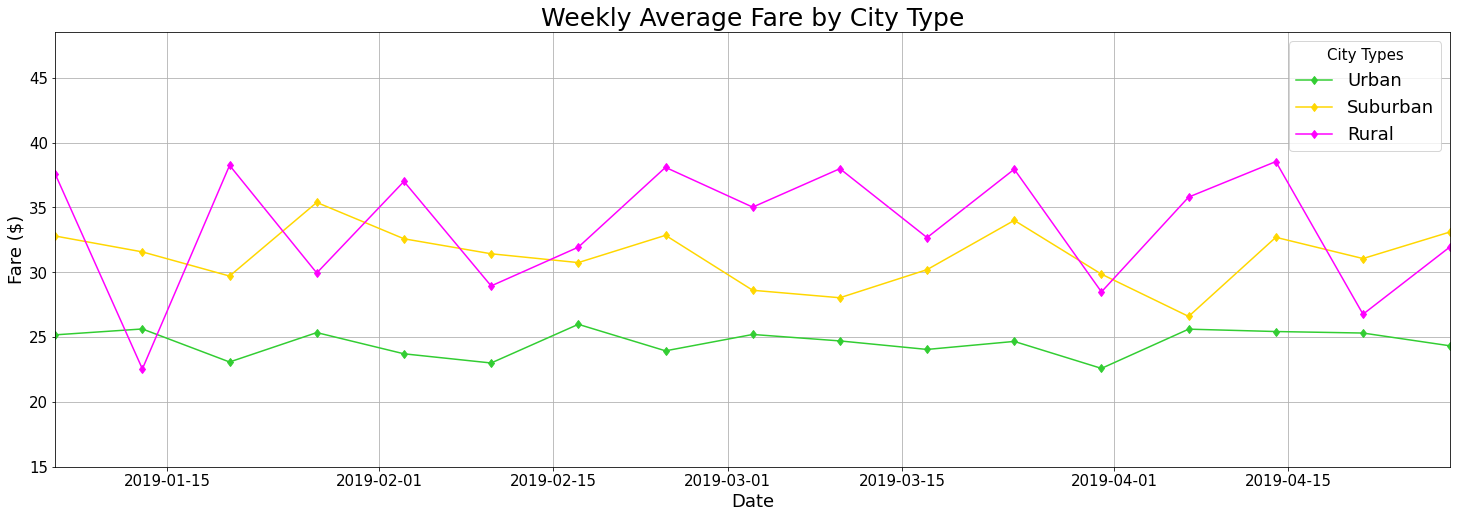

In [46]:
# plot the city types on a line graph
fig8, ax8, = plt.subplots(figsize=(25,8))
ax8.plot(average_fare_by_datetime.index, average_fare_by_datetime['Urban'], color='limegreen', marker='d', label='Urban')
ax8.plot(average_fare_by_datetime.index, average_fare_by_datetime['Suburban'], color='gold', marker='d', label='Suburban')
ax8.plot(average_fare_by_datetime.index, average_fare_by_datetime['Rural'], color='magenta', marker='d', label='Rural')
ax8.set_xlabel('Date', fontsize='18')
ax8.set_ylabel('Fare ($)', fontsize='18')
ax8.set_title('Weekly Average Fare by City Type', fontsize='25')
ax8.set_ylim(15, max(average_fare_by_datetime['Rural'])+10)
ax8.set_xlim(min(average_fare_by_datetime.index), max(average_fare_by_datetime.index))
ax8.legend(title="City Types", fontsize='18', mode='expanded', loc='best')
ax8.grid(True)
png8 = os.path.join('Analysis', 'Weekly_Fare_Average_by_City.png')
fig8.savefig(png8, transparent=False, facecolor='w')


In [38]:
# Ride count by city type accross time
ride_count_by_datetime = all_data.groupby(['type', 'date']).count()
ride_count_by_datetime = ride_count_by_datetime.reset_index()
ride_count_by_datetime = ride_count_by_datetime.pivot(index='date', columns='type', values='ride_id')
ride_count_by_datetime = ride_count_by_datetime.resample('W').sum()
ride_count_by_datetime = ride_count_by_datetime[ride_count_by_datetime.index.month!=5]
ride_count_by_datetime

type,Rural,Suburban,Urban
date,,,
2019-01-06,5.0,22.0,66.0
2019-01-13,3.0,35.0,80.0
2019-01-20,8.0,41.0,84.0
2019-01-27,6.0,34.0,84.0
2019-02-03,9.0,32.0,88.0
2019-02-10,4.0,31.0,94.0
2019-02-17,3.0,34.0,86.0
2019-02-24,11.0,43.0,103.0
2019-03-03,5.0,30.0,88.0


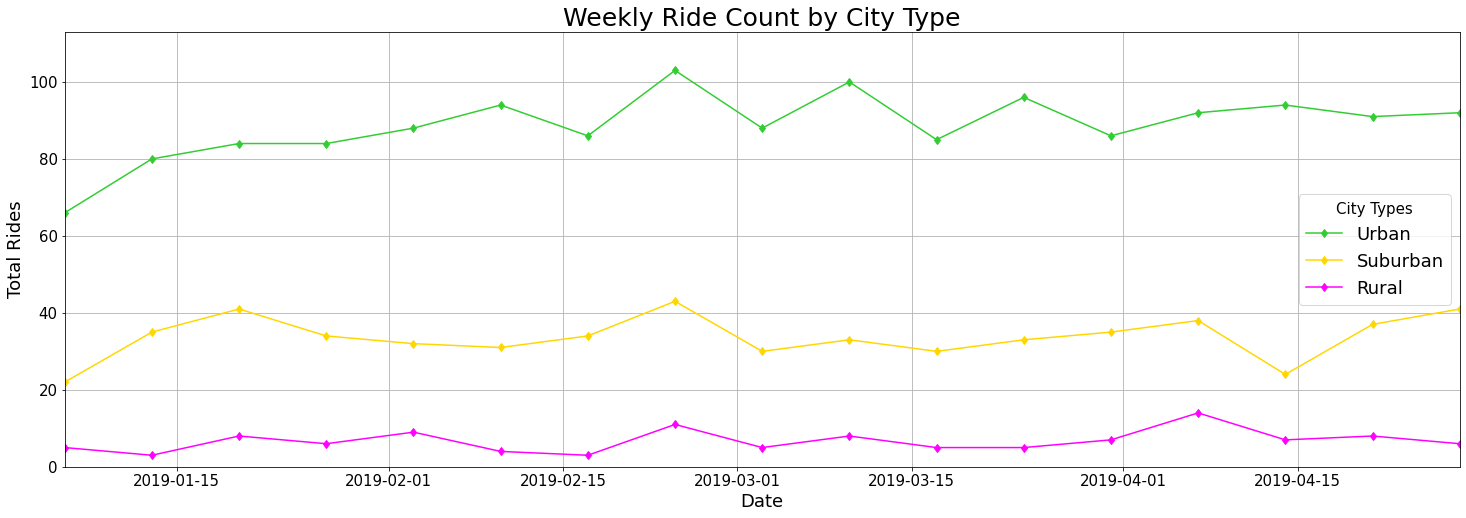

In [45]:
# plot the city types on a line graph
fig9, ax9, = plt.subplots(figsize=(25,8))
ax9.plot(ride_count_by_datetime.index, ride_count_by_datetime['Urban'], color='limegreen', marker='d', label='Urban')
ax9.plot(ride_count_by_datetime.index, ride_count_by_datetime['Suburban'], color='gold', marker='d', label='Suburban')
ax9.plot(ride_count_by_datetime.index, ride_count_by_datetime['Rural'], color='magenta', marker='d', label='Rural')
ax9.set_xlabel('Date', fontsize='18')
ax9.set_ylabel('Total Rides', fontsize='18')
ax9.set_title('Weekly Ride Count by City Type', fontsize='25')
ax9.set_ylim(0, max(ride_count_by_datetime['Urban'])+10)
ax9.set_xlim(min(ride_count_by_datetime.index), max(ride_count_by_datetime.index))
ax9.legend(title="City Types", fontsize='18', mode='expanded', loc='best')
ax9.grid(True)
png9 = os.path.join('Analysis', 'Weekly_Ride_Count_by_City.png')
fig9.savefig(png9, transparent=False, facecolor='w')
